In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
fifa_df = pd.read_csv("fifa.csv", delimiter=";")
fifa_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
fifa_df = fifa_df.iloc[:,53:87]
fifa_korelasyon = fifa_df.corr()
fifa_korelasyon

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Crossing,1.000000,0.655300,0.469507,0.809660,0.690339,0.856647,0.833105,0.761107,0.756527,0.840916,...,0.645805,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539
Finishing,0.655300,1.000000,0.473427,0.661830,0.882675,0.824337,0.759229,0.697550,0.512806,0.788376,...,0.837827,0.533414,0.024218,-0.033023,-0.071811,-0.588752,-0.587145,-0.583268,-0.584852,-0.586913
HeadingAccuracy,0.469507,0.473427,1.000000,0.640091,0.505639,0.550750,0.440846,0.407772,0.510779,0.658175,...,0.551978,0.507208,0.583123,0.561063,0.533643,-0.750417,-0.749888,-0.746444,-0.744443,-0.748895
ShortPassing,0.809660,0.661830,0.640091,1.000000,0.698309,0.843722,0.775398,0.736659,0.895722,0.911451,...,0.676063,0.685137,0.559576,0.541131,0.508644,-0.729785,-0.728024,-0.724381,-0.723782,-0.728721
Volleys,0.690339,0.882675,0.505639,0.698309,1.000000,0.809639,0.807285,0.749637,0.571050,0.794935,...,0.829257,0.595281,0.120919,0.072788,0.035457,-0.590808,-0.588668,-0.584954,-0.586131,-0.588670
Dribbling,0.856647,0.824337,0.550750,0.843722,0.809639,1.000000,0.842652,0.753600,0.722465,0.938942,...,0.769594,0.597498,0.336072,0.301251,0.273963,-0.754625,-0.753181,-0.749816,-0.751348,-0.754341
Curve,0.833105,0.759229,0.440846,0.775398,0.807285,0.842652,1.000000,0.861277,0.710807,0.829568,...,0.751833,0.616532,0.289529,0.261481,0.232869,-0.606286,-0.603141,-0.600266,-0.603540,-0.604960
FKAccuracy,0.761107,0.697550,0.407772,0.736659,0.749637,0.753600,0.861277,1.000000,0.703544,0.759548,...,0.734440,0.585120,0.297976,0.279153,0.247903,-0.556605,-0.553644,-0.549911,-0.552641,-0.554920
LongPassing,0.756527,0.512806,0.510779,0.895722,0.571050,0.722465,0.710807,0.703544,1.000000,0.788650,...,0.542247,0.645797,0.587106,0.587430,0.562230,-0.596820,-0.594999,-0.591453,-0.591561,-0.595887
BallControl,0.840916,0.788376,0.658175,0.911451,0.794935,0.938942,0.829568,0.759548,0.788650,1.000000,...,0.769791,0.674881,0.452705,0.417566,0.384802,-0.788444,-0.786797,-0.783423,-0.783607,-0.787939


Text(0.5, 1.0, 'Korelasyon Matrisi (FIFA)')

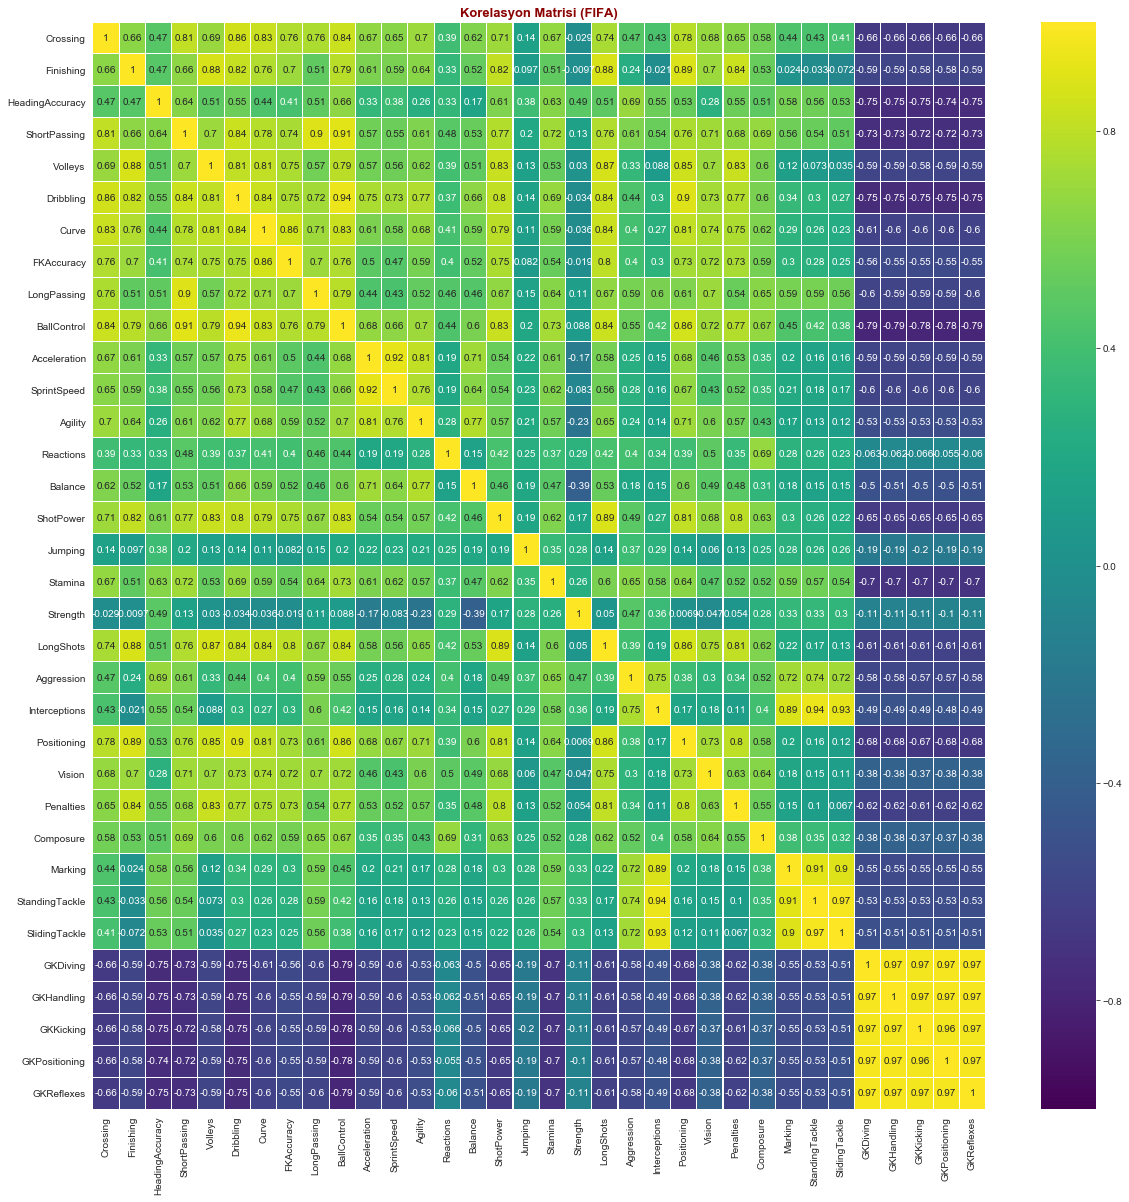

In [4]:
plt.figure(figsize=(20,20))
sns.heatmap(fifa_korelasyon, annot=True, linewidths=.1, vmin=-1 , vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (FIFA)" , fontdict=baslik_font)


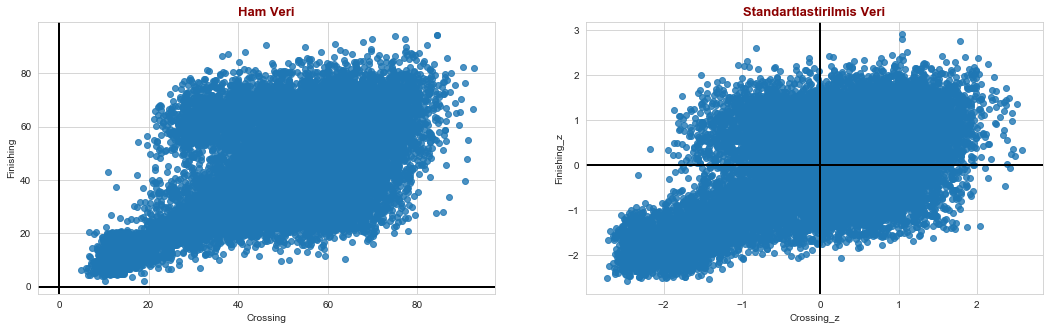

In [5]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
t=sns.regplot('Crossing','Finishing', fifa_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0,color='k', linestyle='-', linewidth=2)
t.axvline(0,color='k', linestyle='-', linewidth=2)
t.axes.set_title("Ham Veri", fontdict=baslik_font)

plt.subplot(1,2,2)
fifa_st_df = pd.DataFrame()
fifa_st_df['Crossing_z']= (fifa_df['Crossing']- fifa_df['Crossing'].mean())/fifa_df['Crossing'].std()
fifa_st_df['Finishing_z']= (fifa_df['Finishing']- fifa_df['Finishing'].mean())/fifa_df['Finishing'].std()

t=sns.regplot('Crossing_z','Finishing_z', fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0,color='k', linestyle='-', linewidth=2)
t.axvline(0,color='k', linestyle='-', linewidth=2)
t.axes.set_title("Standartlastirilmis Veri", fontdict=baslik_font)
plt.show()

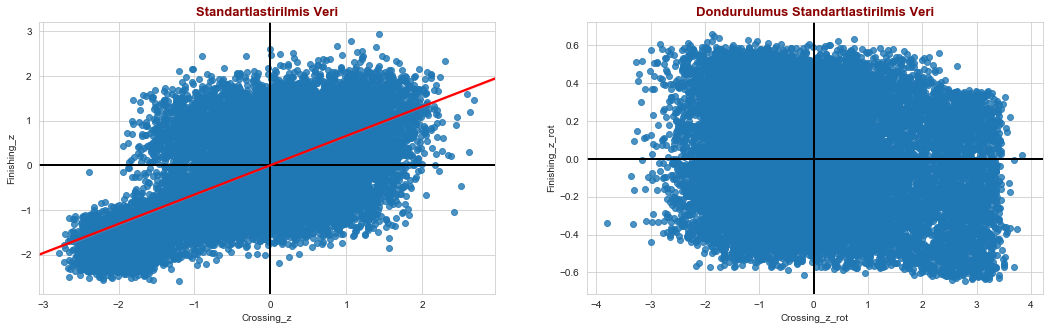

In [9]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
t=sns.regplot('Crossing_z','Finishing_z', fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0,color='k', linestyle='-', linewidth=2)
t.axvline(0,color='k', linestyle='-', linewidth=2)
t.axes.set_title("Standartlastirilmis Veri", fontdict=baslik_font)

sns.regplot('Crossing_z','Finishing_z', fifa_st_df, scatter=False ,color="red")

plt.subplot(1,2,2)
fifa_st_df['Crossing_z_rot']=math.cos(40)*fifa_st_df['Crossing_z']- math.sin(40)*fifa_st_df['Crossing_z']
fifa_st_df['Finishing_z_rot']=math.sin(40)*fifa_st_df['Finishing_z']+ math.cos(40)*fifa_st_df['Finishing_z']

t=sns.regplot('Crossing_z_rot','Finishing_z_rot', fifa_st_df, x_jitter=.49, y_jitter=.49, fit_reg=False)
t.axhline(0,color='k', linestyle='-', linewidth=2)
t.axvline(0,color='k', linestyle='-', linewidth=2)
t.axes.set_title("Dondurulumus Standartlastirilmis Veri", fontdict=baslik_font)
plt.show()

In [10]:
fifa_df = fifa_df.dropna()
X = StandardScaler().fit_transform(fifa_df)

Xt = X.T
Cx = np.cov(Xt)
print('Kovaryans matrisi :\n', Cx)

Kovaryans matrisi :
 [[ 1.00005507  0.65533573  0.46953243 ... -0.65980319 -0.6601961
  -0.66257575]
 [ 0.65533573  1.00005507  0.4734528  ... -0.58330031 -0.5848846
  -0.5869451 ]
 [ 0.46953243  0.4734528   1.00005507 ... -0.74648538 -0.74448373
  -0.74893673]
 ...
 [-0.65980319 -0.58330031 -0.74648538 ...  1.00005507  0.96438954
   0.96639022]
 [-0.6601961  -0.5848846  -0.74448373 ...  0.96438954  1.00005507
   0.97018302]
 [-0.66257575 -0.5869451  -0.74893673 ...  0.96639022  0.97018302
   1.00005507]]


In [11]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Özvektör {}: \n{}'.format(i + 1, eigvec_cov))
    print('Özdeğer  {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'Verikümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    eig_val_cov / sum(eig_val_cov)
)

Özvektör 1: 
[ 0.20031595  0.17960135  0.16494839  0.21087143  0.18542573  0.21397064
  0.19617801  0.18312402  0.186724    0.22044379  0.16424625  0.1624329
  0.16678123  0.09792308  0.14590308  0.19692239  0.06061726  0.18570425
  0.02849067  0.19595275  0.14657334  0.11695874  0.20068377  0.16230508
  0.18109287  0.15539206  0.12426471  0.11747611  0.11021307 -0.19648369
 -0.19617625 -0.1953696  -0.1954223  -0.19629495]
Özdeğer  1: 18.849144201671347
----------------------------------------
Özvektör 2: 
[-0.04188421 -0.22162393  0.17520018  0.03223146 -0.17866954 -0.10445267
 -0.12066113 -0.09891488  0.06745204 -0.03766039 -0.1279576  -0.10640897
 -0.1632028   0.01563515 -0.13947955 -0.08463877  0.11637021  0.10149888
  0.23049983 -0.14678066  0.25950774  0.34905342 -0.1528266  -0.15114339
 -0.14906097  0.00878257  0.33567009  0.35914161  0.36205102 -0.0824759
 -0.08304541 -0.08346555 -0.08147188 -0.08256632]
Özdeğer  2: 4.910824565403956
----------------------------------------
Özv

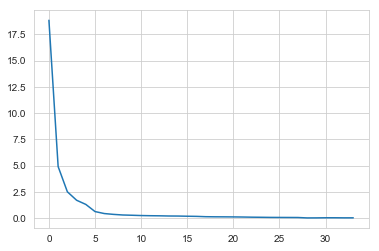

[18.8491442   4.91082457  2.51121968  1.70665278  1.30927179  0.62753979
  0.43931226  0.35950551  0.30147802  0.27677676  0.24896514  0.23252326
  0.22333056  0.20544558  0.20035624  0.18330501  0.17019445  0.13863386
  0.12832669  0.1245334   0.11821725  0.1076127   0.09255947  0.0833471
  0.07218427  0.06826828  0.06511574  0.0613974   0.02293761  0.02663417
  0.03729554  0.03753585  0.03038518  0.03104236]


In [12]:
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

Veri kümesindeki toplam varyans yüzdesi Elle hesaplanan bileşen.
 [0.55435606 0.14442806 0.07385533 0.05019291 0.03850587]


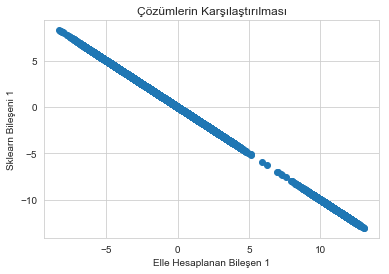

In [13]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

Y = P.T.dot(Xt)

print(
    'Veri kümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Çözümlerin Karşılaştırılması')
plt.ylabel('Sklearn Bileşeni 1')
plt.xlabel('Elle Hesaplanan Bileşen 1')
plt.show()